# Day-63: Deep Learning Project - Detect Fraud: A Critical Binary Classification Project

Today, we are using the famous Kaggle Credit Card Fraud Detection dataset as our practical template. This is the ultimate test of your skills because the data is severely imbalanced: for every 1000 transactions, maybe only 1 is fraud. We will build a Feedforward Neural Network (FFNN) optimized to find that one needle in the haystack!

In [1]:
# ! pip install tensorflow

## 1. Data Preparation

In [2]:
# 1. Data Preparation
import pandas as pd
from kagglehub import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print(path)

df = pd.read_csv(path + '\creditcard.csv')
# Display first few rows of the dataframe
df.head()

c:\Users\amey9\Documents\GitHub\DataScience-100-Days-of-Data-Science\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\amey9\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The Kaggle dataset has 31 columns, but most are already cleaned up for us:

- V1 to V28: These are already scaled and anonymized features from PCA. The neural network can handle them directly.

- Time: The elapsed time between the first transaction and the current one. This is often dropped or transformed. We will drop it for our simple FFNN.

- Amount: This feature is not scaled and must be standardized, just like we did with our FFNN examples, using StandardScaler.

- Class: The target variable (0 = Legit, 1 = Fraud).

The Kaggle dataset has 31 columns, but most are already cleaned up for us:

- V1 to V28: These are already scaled and anonymized features from PCA. The neural network can handle them directly.

- Time: The elapsed time between the first transaction and the current one. This is often dropped or transformed. We will drop it for our simple FFNN.

- Amount: This feature is not scaled and must be standardized, just like we did with our FFNN examples, using StandardScaler.

Class: The target variable (0 = Legit, 1 = Fraud).

In [3]:
# shape of the dataset
print(f"Dimensions of dataset:{df.shape}")

# data types and non-null counts
print(f"Info about dataset:\n{df.info()}")

# Check for class imbalance
print(f"Class distribution:\n{df['Class'].value_counts()}")

Dimensions of dataset:(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     28480

### Solution for imbalance data

Since the model gets a 99.9% Accuracy by predicting "Legit" every time, we must tell the model that missing a Fraud case (False Negative) is 500× worse than misclassifying a legitimate transaction (False Positive).

- Technique: We  will pass the `class_weight` dictionary to the `model.fit()` function.

    - {0: 1} (Weight for Legit class: 1)

    - {1: 199} (Weight for Fraud class: ≈ Weight of majority divided by minority)

Why it's a Big Deal: This is the game-changer! It forces the model to heavily penalize errors on the rare fraud class, ensuring it actively tries to find those few crucial examples.

c:\Users\amey9\Documents\GitHub\DataScience-100-Days-of-Data-Science\.venv\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


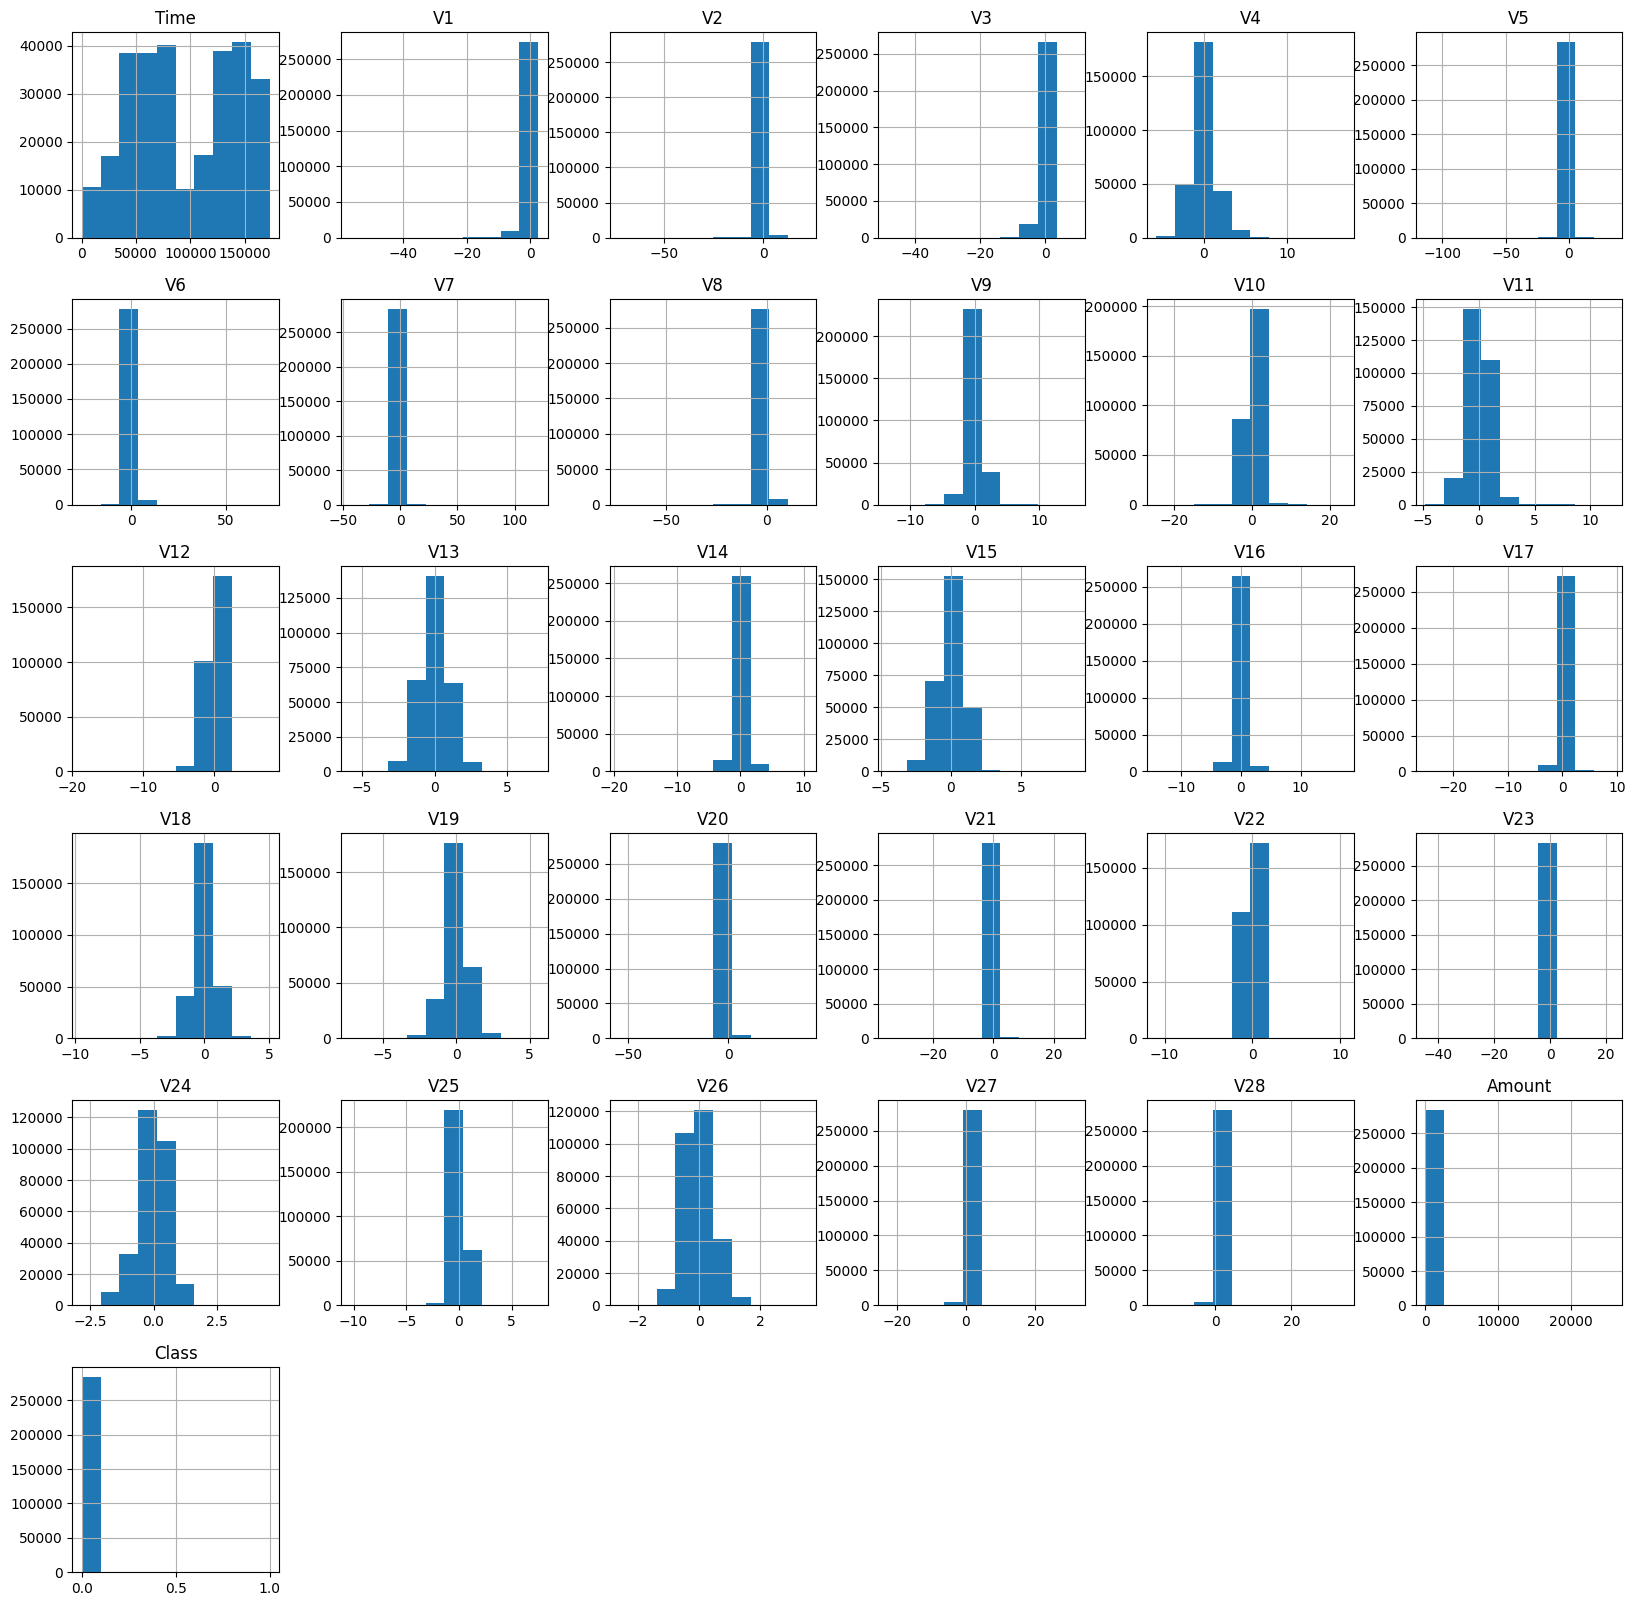

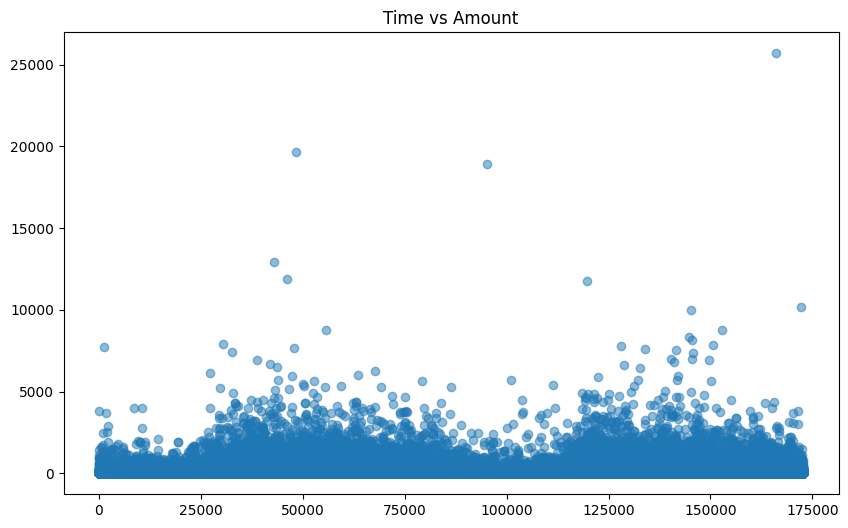

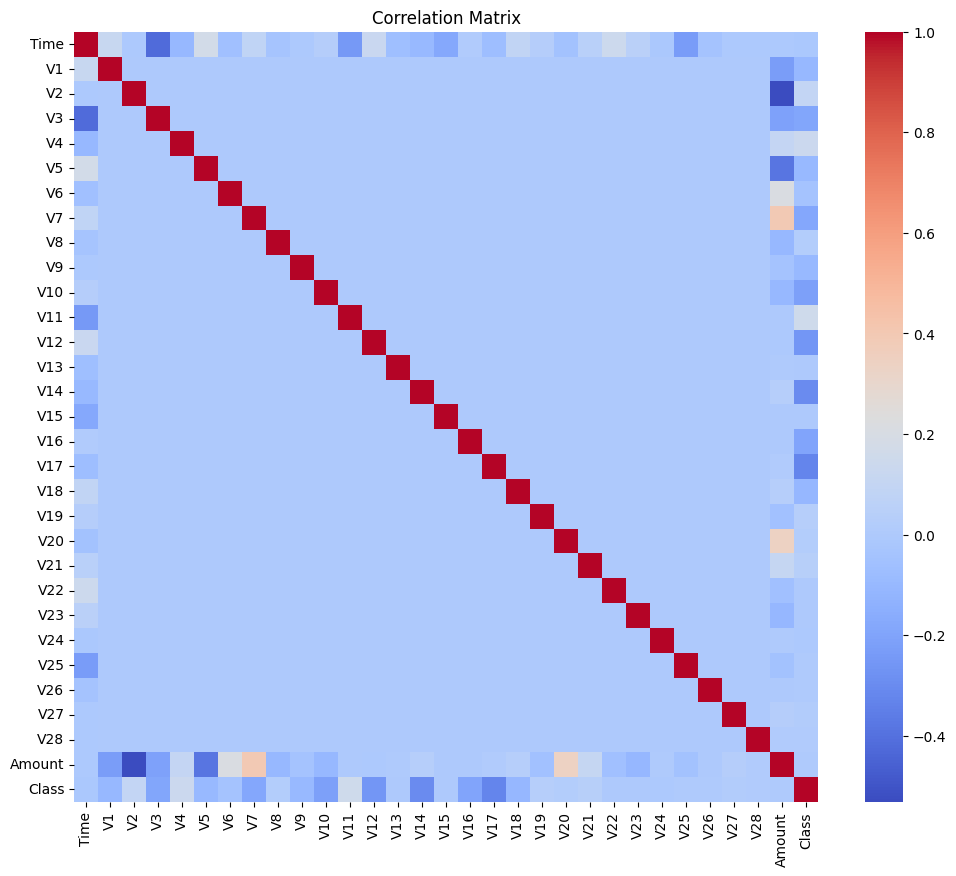

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check distribution of features
df.hist(figsize=(20, 20))

# check time vs amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Amount'], alpha=0.5)
plt.title('Time vs Amount')

# Check correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2. Data Preprocessing

### Scaling Time and amount

The Time column, just like the Amount column, is an unscaled numerical feature. The values for Time go up to 172,792.0 (seconds), which is a massive range. If we pass it directly to the neural network without scaling, it will dominate the weights for the first layer, just like an unscaled Amount would.

To adhere to best practices for production FFNNs, we should absolutely scale the Time feature alongside Amount and use it in the model.

In [5]:
# 2. Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define scaler
scaler = StandardScaler()

# Scale 'Amount' and 'Time' features
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])


# define features and target
X = df.drop('Class', axis=1)
y = df['Class']

# split data into training and testing sets (30% test size, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# validation set from training data (20% of training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")


Training set shape: (199364, 30), Testing set shape: (85443, 30)
Training set shape: (159491, 30), Validation set shape: (39873, 30)


## 3. Build the Feedforward Neural Network (FFNN)

In [6]:
# 3. Build the Feedforward Neural Network (FFNN)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# import class_weight from sklearn.utils
from sklearn.utils import class_weight
import numpy as np

# Define the model architecture FFNN
model_ffnn = models.Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer , binary crossentropy loss and accuracy metric
model_ffnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

classes_np = np.unique(y_train)
# define class weights to handle class imbalance by sklearn into a dictionary for keras based on y_train
weights_array= class_weight.compute_class_weight(class_weight='balanced', classes=classes_np, y=y_train)
class_weights = {i: weights_array[i] for i in range(len(weights_array))}

# extract class weights for each class
weight_legit = weights_array[0]
weight_fraud = weights_array[1]

# print class weights based type
print(f"Class weights: {weights_array}")
print(f"Weight for Legit class: {weight_legit}")
print(f"Weight for Fraud class: {weight_fraud}")

# model summary
model_ffnn.summary()



Class weights: [  0.50086361 289.98363636]
Weight for Legit class: 0.5008636066726962
Weight for Fraud class: 289.9836363636364


c:\Users\amey9\Documents\GitHub\DataScience-100-Days-of-Data-Science\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Training & Validation

In [7]:
from tensorflow import keras

# callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
history = model_ffnn.fit(X_train, y_train, epochs=50, batch_size=2048, validation_data=(X_val, y_val), class_weight=class_weights, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9393 - loss: 0.2887 - val_accuracy: 0.9887 - val_loss: 0.1170 - learning_rate: 0.0010
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9767 - loss: 0.1538 - val_accuracy: 0.9638 - val_loss: 0.1448 - learning_rate: 0.0010
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9755 - loss: 0.1173 - val_accuracy: 0.9762 - val_loss: 0.0910 - learning_rate: 0.0010
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9790 - loss: 0.0973 - val_accuracy: 0.9732 - val_loss: 0.0883 - learning_rate: 0.0010
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0806 - val_accuracy: 0.9841 - val_loss: 0.0571 - learning_rate: 0.0010
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9801 - loss: 0.0690 - val_accuracy: 0.9833 - val_loss: 0.0505 - learning_rate: 0.0010
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9806 - loss: 0.0627 - val_accuracy: 

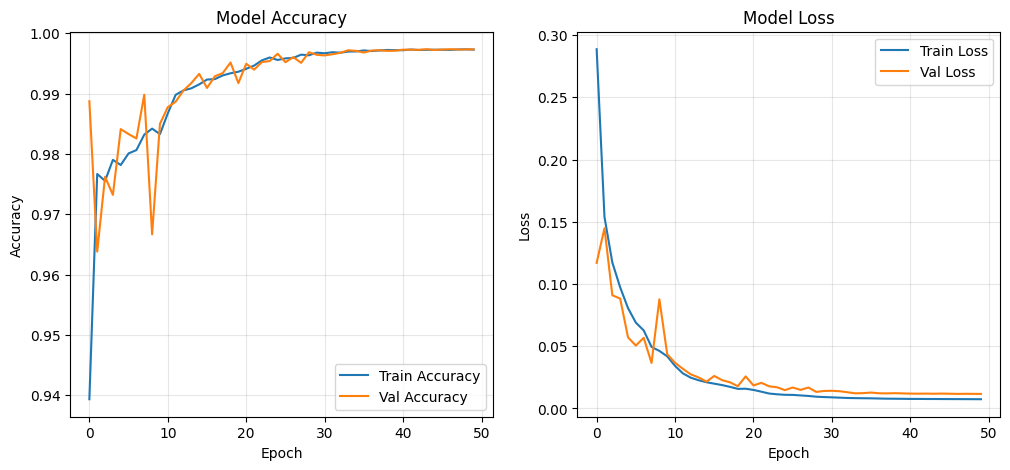

In [8]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.grid(True, alpha=0.3)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import precision_score,recall_score,f1_score
from tabulate import tabulate

# --- 4. Evaluation: Focusing on Imbalance Metrics ---
print("--- 4. Evaluating the Model on Test Data ---")
y_proba = model_ffnn.predict(X_test, verbose=0)
y_pred = (y_proba > 0.5).astype(int) 

# Calculate the critical metrics
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
accuracy = model_ffnn.evaluate(X_test, y_test, verbose=0)[1] 

print(tabulate([
    ["Accuracy (Still High, but Ignore!)", f"{accuracy*100:.2f}%"],
    ["Precision (False Alarms)", f"{precision:.4f}"],
    ["Recall (Catch Rate - The Priority!)", f"{recall:.4f}"],
    ["F1-Score (Balanced Measure)", f"{f1:.4f}"],
], headers=["Metric", "Value"], tablefmt="github"))

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

--- 4. Evaluating the Model on Test Data ---
| Metric                              | Value   |
|-------------------------------------|---------|
| Accuracy (Still High, but Ignore!)  | 99.68%  |
| Precision (False Alarms)            | 0.3261  |
| Recall (Catch Rate - The Priority!) | 0.8108  |
| F1-Score (Balanced Measure)         | 0.4651  |
Confusion Matrix:
[[85047   248]
 [   28   120]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.33      0.81      0.47       148

    accuracy                           1.00     85443
   macro avg       0.66      0.90      0.73     85443
weighted avg       1.00      1.00      1.00     85443



## 5. Model Saving & Loading

In [10]:
### 5. Model Saving & Loading
# Save the model
model_ffnn.save('fraud_detection_model.keras')
# Load the model
loaded_model = keras.models.load_model('fraud_detection_model.keras')

loaded_model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics =[
        "accuracy",
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
    ],
)


# Verify loaded model
results = loaded_model.evaluate(X_test, y_test, return_dict=True)
print(
    f"Loaded Model Test Loss: {results['loss']}\n"
    f"Loaded Model Test Accuracy: {results['accuracy']}\n"
    f"Loaded Model Test Precision: {results['precision']}\n"
    f"Loaded Model Test Recall: {results['recall']}"
)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 849us/step - accuracy: 0.9968 - loss: 0.0135 - precision: 0.3261 - recall: 0.8108
Loaded Model Test Loss: 0.013482332229614258
Loaded Model Test Accuracy: 0.9967697858810425
Loaded Model Test Precision: 0.32608696818351746
Loaded Model Test Recall: 0.8108108043670654


## Summary of Day 63

We learned that building a model is one thing, but understanding the context of the data is everything!

In our fraud detection project, we tackled the challenge of Imbalanced Data, where `Accuracy` is useless. we mastered the use of `Precision` (avoiding false alarms) and `Recall` (catching real fraud) as the essential metrics. This understanding is key for any real-world classification system!

## What's Next (Day 64)

We've been mastering FFNNs on tabular data, which is great for things like financial transactions. But what about images? How do you feed a million pixels into a simple Dense layer? It’s not efficient!

Tomorrow, on Day 64, we are pivoting to the next major architecture: `Convolutional Neural Networks` (CNNs)! We will understand Why CNNs are necessary for image data, what Receptive Fields are, and how they build `Spatial Hierarchies`. Get ready to dive into the world of computer vision!